In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt
import warnings

# Ignore Warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data frame from loan csv using read_csv method
loan_data_df=pd.read_csv('loan.csv',error_bad_lines=False)
loan_data_df.head() # print the head of the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data_df.shape # The number of rows is 39717 and columns is 111

(39717, 111)

In [4]:
len(loan_data_df)

39717

# Data Cleaning

In [5]:
# Check if there is entries/row with duplicate records or ids
loan_data_df[loan_data_df['id'].duplicated(keep='first')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [6]:
# Ensure no duplicate records are available
len(loan_data_df[loan_data_df.duplicated()])

0

In [7]:
# Since there is 0 duplicate records we can proceed

##### Since the row count is 0, there are duplicate ids or duplicate records

In [8]:
# Check whether the data includes un-neccassary data
loan_data_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [9]:
# Remove the loans with status as Current since the data is not needed for the case study
loan_data_df= loan_data_df[loan_data_df['loan_status']!='Current']
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
loan_data_df.shape

(38577, 111)

##### Remove null values and na values from data frame

In [11]:
(loan_data_df.isnull().sum()*100)/len(loan_data_df) # Check total columns with null values

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [12]:
len(loan_data_df.columns[loan_data_df.isna().all()]) # check the total columns with na values

55

##### Since we have na values we need to drop it using Pandas drop command

In [13]:
# drop all na values in rows and columns
loan_data_df = loan_data_df.dropna(axis=1, how="all")
loan_data_df = loan_data_df.dropna(axis=0, how="all")
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
loan_data_df.shape

(38577, 56)

In [15]:
# loan_data_df.nunique().sort_values()

In [16]:
# remove sub_grade column since the case study will concentrate on grade/group
loan_data_df = loan_data_df.drop(['sub_grade'],  axis=1)

In [17]:
loan_data_df.shape

(38577, 55)

In [18]:
# remove text based columns since they will not affect the end result
loan_data_df.drop(['desc','title'],inplace=True, axis=1)

In [19]:
loan_data_df.shape

(38577, 53)

In [20]:
loan_data_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_l

In [21]:
loan_data_df['term'].dtype

dtype('O')

##### Since the term data is a object we need to convert into int

In [22]:
loan_data_df['term'] = loan_data_df['term'].apply(lambda x: int(x.strip().split()[0]))

In [23]:
loan_data_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                       object
installment                   float64
grade                          object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_l

In [24]:
loan_data_df['term'].dtype # Data type should be converted from object to int

dtype('int64')

In [25]:
loan_data_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90%,156.46,A,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [26]:
# Similary fix int rate from string to float
loan_data_df['int_rate']=loan_data_df['int_rate'].str.strip('%').astype(float)

In [27]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
loan_data_df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [29]:
import re
import math

def strip_emp_length(x):
    if isinstance(x, float) and math.isnan(x):
        return 0
    
    x = str(x)
    pattern = r'\d+\+?'
    matches = re.findall(pattern, x)
    if matches:
        match = matches[0]
        match = match.replace('+', '')
        return int(match)
    else:
        return 0;

loan_data_df['emp_length']=loan_data_df['emp_length'].apply(lambda x : strip_emp_length(x) )
loan_data_df['emp_length']

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: int64

In [30]:
# the date frame contains date format convert it date format
loan_data_df['issue_d'] = pd.to_datetime(loan_data_df.issue_d, format='%b-%y')
loan_data_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [31]:
(loan_data_df.isnull().sum()*100)/len(loan_data_df) # Check if there are null data

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_title                      6.185033
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


In [32]:
# remove all rows values with na
loan_data_df= loan_data_df[loan_data_df['emp_title'].notna()]
loan_data_df= loan_data_df[loan_data_df['emp_length'].notna()]
loan_data_df= loan_data_df[loan_data_df['mths_since_last_delinq'].notna()]
loan_data_df= loan_data_df[loan_data_df['mths_since_last_record'].notna()]
loan_data_df= loan_data_df[loan_data_df['last_pymnt_d'].notna()]
loan_data_df= loan_data_df[loan_data_df['collections_12_mths_ex_med'].notna()]
loan_data_df= loan_data_df[loan_data_df['chargeoff_within_12_mths'].notna()]
loan_data_df= loan_data_df[loan_data_df['pub_rec_bankruptcies'].notna()]
loan_data_df= loan_data_df[loan_data_df['tax_liens'].notna()]
loan_data_df= loan_data_df[loan_data_df['revol_util'].notna()]

In [33]:
(loan_data_df.isnull().sum()*100)/len(loan_data_df)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
mths_since_last_delinq        0.0
mths_since_last_record        0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [34]:
loan_data_df['emp_length']

94        4
161       2
253      10
359       4
382       6
         ..
39433     7
39475     6
39551     2
39562     1
39623     8
Name: emp_length, Length: 809, dtype: int64

##### Add new columns for date, month, year

In [35]:
# calculate the day, year and month using date column issue_d using DateTimeIndex
loan_data_df['issue_year']=pd.DatetimeIndex(loan_data_df['issue_d']).year
loan_data_df['issue_day']=pd.DatetimeIndex(loan_data_df['issue_d']).day
loan_data_df['issue_month']=pd.DatetimeIndex(loan_data_df['issue_d']).month

In [36]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_day,issue_month
94,1068545,1303147,7000,7000,7000.0,36,11.71,231.54,B,Harris,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12
161,1062177,1294027,15000,15000,15000.0,36,17.27,536.81,D,Senior Dental Insurance Solutions,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12
253,1066424,1291243,5500,5500,5500.0,36,7.90,172.10,A,SCI Mahanoy,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12
359,1064908,1298959,9000,9000,9000.0,36,14.65,310.45,C,st catherine of siena,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12
382,1064623,1298440,5600,5600,5600.0,36,10.65,182.42,B,ECR Inc,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12


In [37]:
# lets inspect our data after the clean up
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 94 to 39623
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          809 non-null    int64         
 1   member_id                   809 non-null    int64         
 2   loan_amnt                   809 non-null    int64         
 3   funded_amnt                 809 non-null    int64         
 4   funded_amnt_inv             809 non-null    float64       
 5   term                        809 non-null    int64         
 6   int_rate                    809 non-null    float64       
 7   installment                 809 non-null    float64       
 8   grade                       809 non-null    object        
 9   emp_title                   809 non-null    object        
 10  emp_length                  809 non-null    int64         
 11  home_ownership              809 non-null    object     

# Univariate Analysis

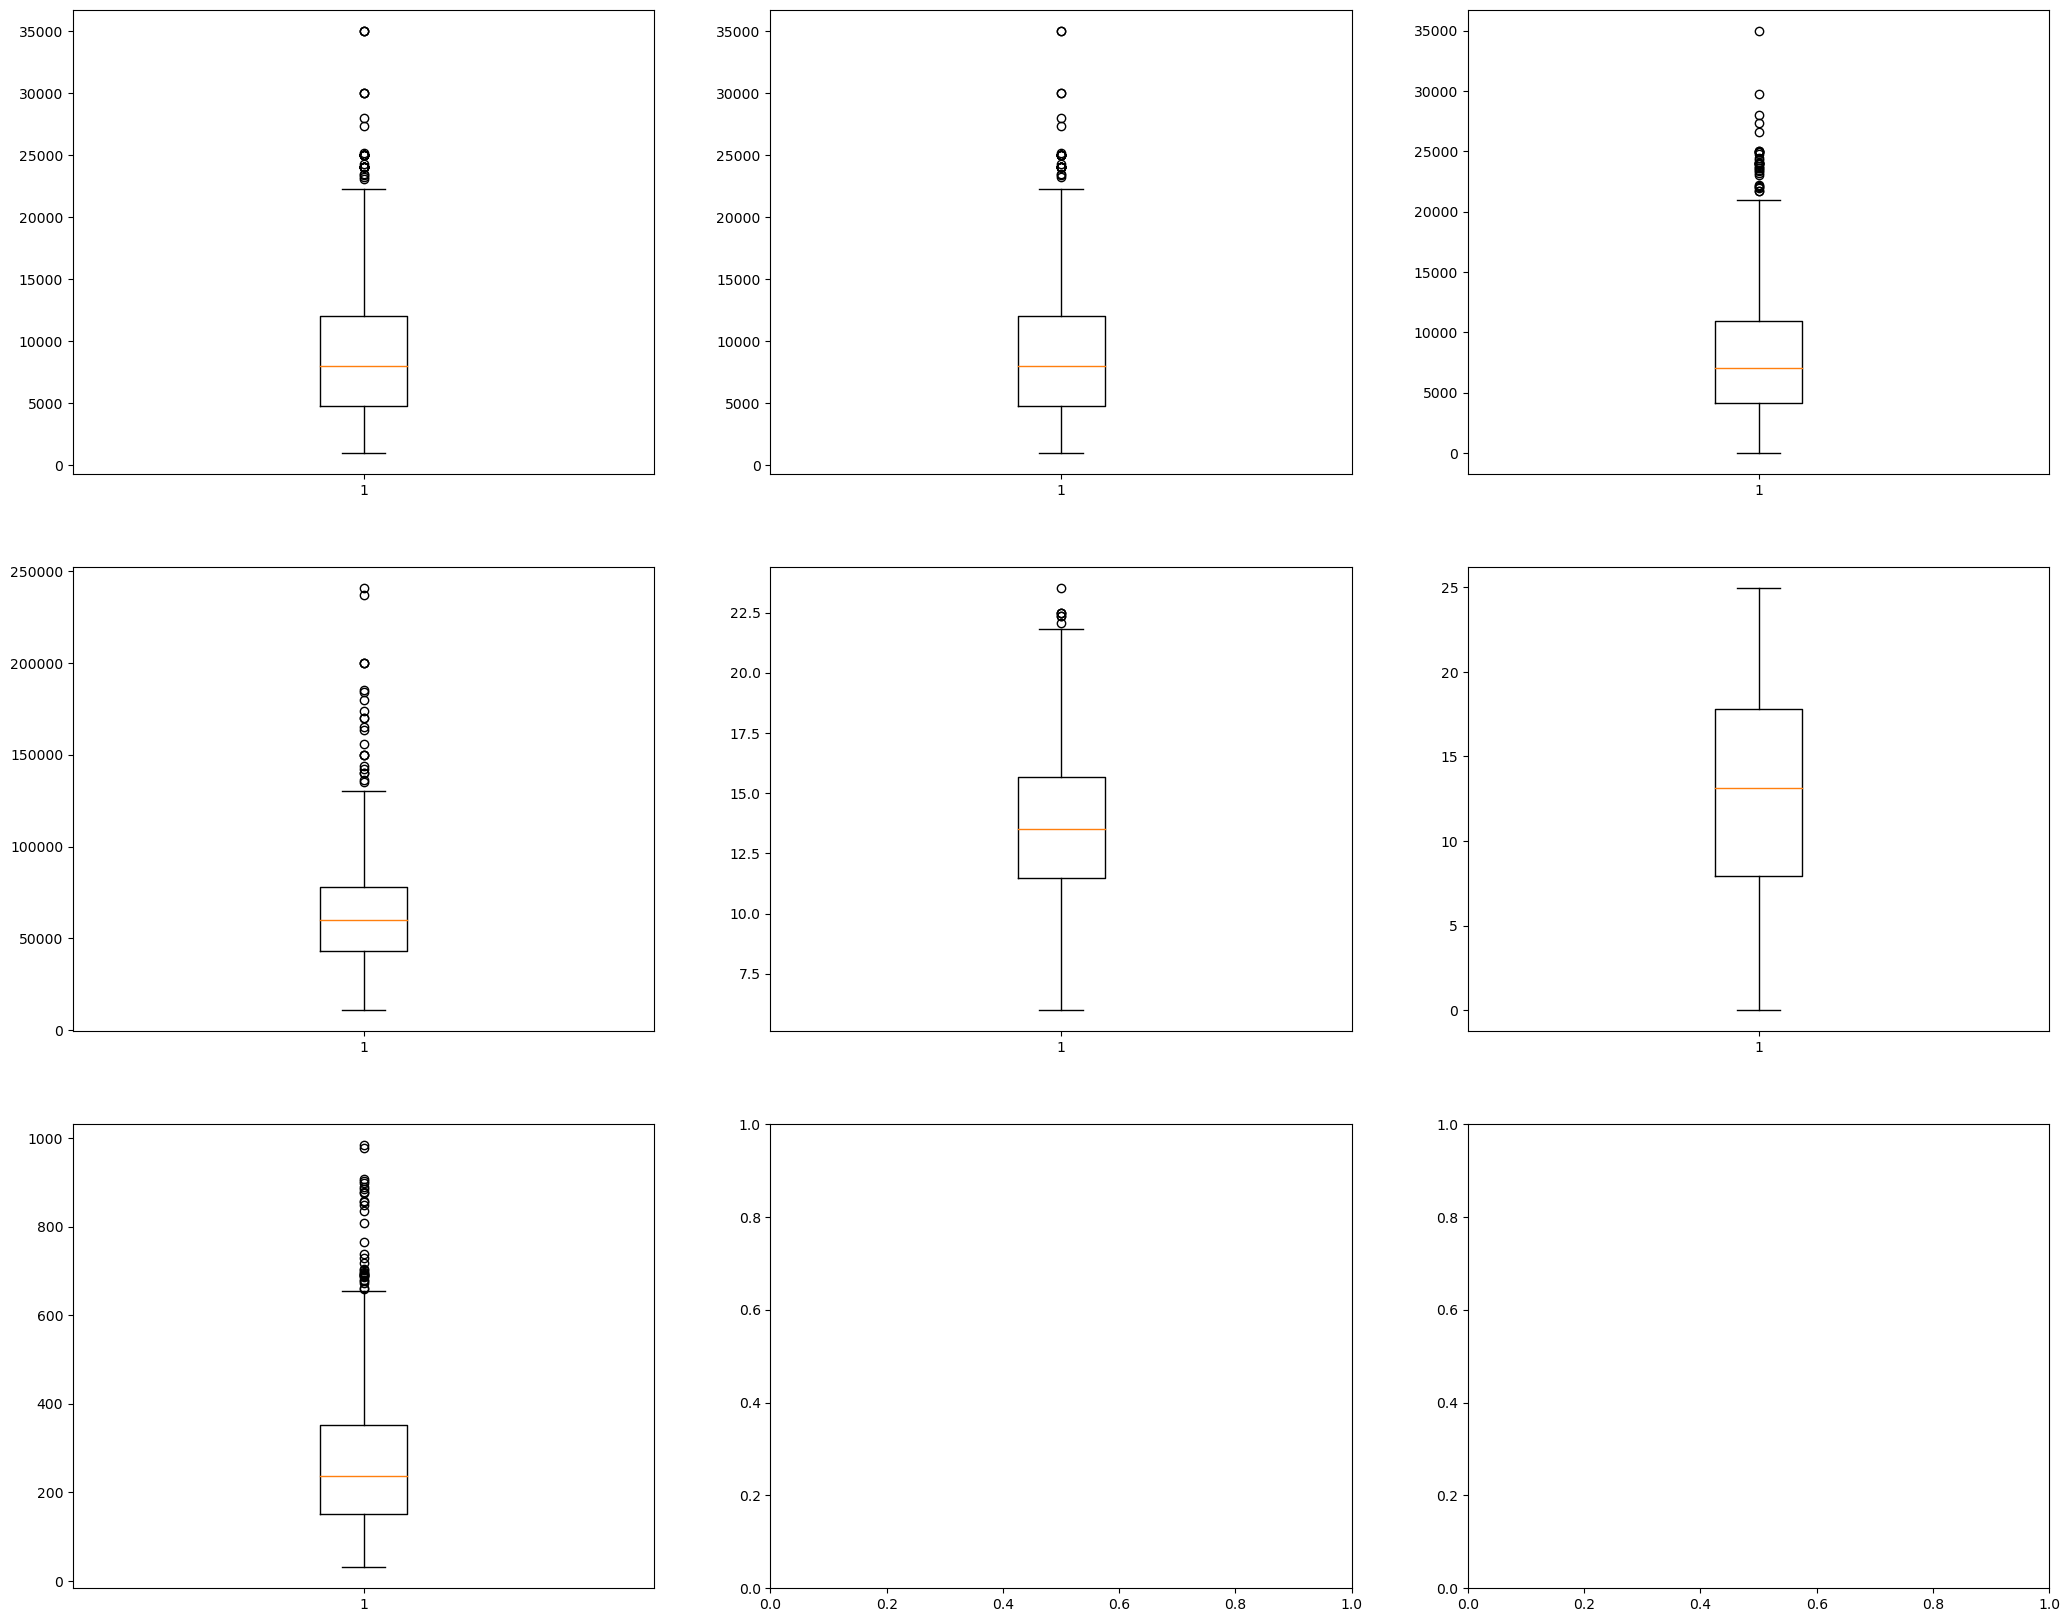

In [38]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharex=False, sharey=False)

loan_amount = axs[0][0].boxplot(loan_data_df['loan_amnt'])
axs[0][0].set_label('Loan Amount')

funded_amnt = axs[0][1].boxplot(loan_data_df['funded_amnt'])
axs[0][1].set_label('Funded Amount')

funded_amnt_inv = axs[0][2].boxplot(loan_data_df['funded_amnt_inv'])
axs[0][1].set_label('Funded Amount Inv')

annual_inc = axs[1][0].boxplot(loan_data_df['annual_inc'])
axs[1][0].set_label('Annual Inc')

int_rate = axs[1][1].boxplot(loan_data_df['int_rate'])
axs[1][1].set_label('Interest rate')

dti = axs[1][2].boxplot(loan_data_df['dti'])
axs[1][2].set_label('dti')

installment = axs[2][0].boxplot(loan_data_df['installment'])
axs[2][0].set_label('installment')

fig.set_size_inches(25.5, 20.5, forward=True)

plt.show()

In [39]:
# # Removing the outliers from columns
outliers_columns= ['int_rate', 'installment', 'annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv']

# Define a function to remove outliers based on z-score
def remove_outliers_z(data, cols,threshold):
    return data[(np.abs(data[cols] - data[cols].mean()) < threshold * data[cols].std()).all(axis=1)]

outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
loan_data_df = remove_outliers_z(loan_data_df, outliers_columns, 1.5)
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_day,issue_month
94,1068545,1303147,7000,7000,7000.0,36,11.71,231.54,B,Harris,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12
359,1064908,1298959,9000,9000,9000.0,36,14.65,310.45,C,st catherine of siena,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12
382,1064623,1298440,5600,5600,5600.0,36,10.65,182.42,B,ECR Inc,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12
587,1062384,1294244,2400,2400,2400.0,36,12.69,80.51,B,Portland Public Schools,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12
1323,1052333,1283889,15000,15000,15000.0,36,12.42,501.23,B,United States Postal Service,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12


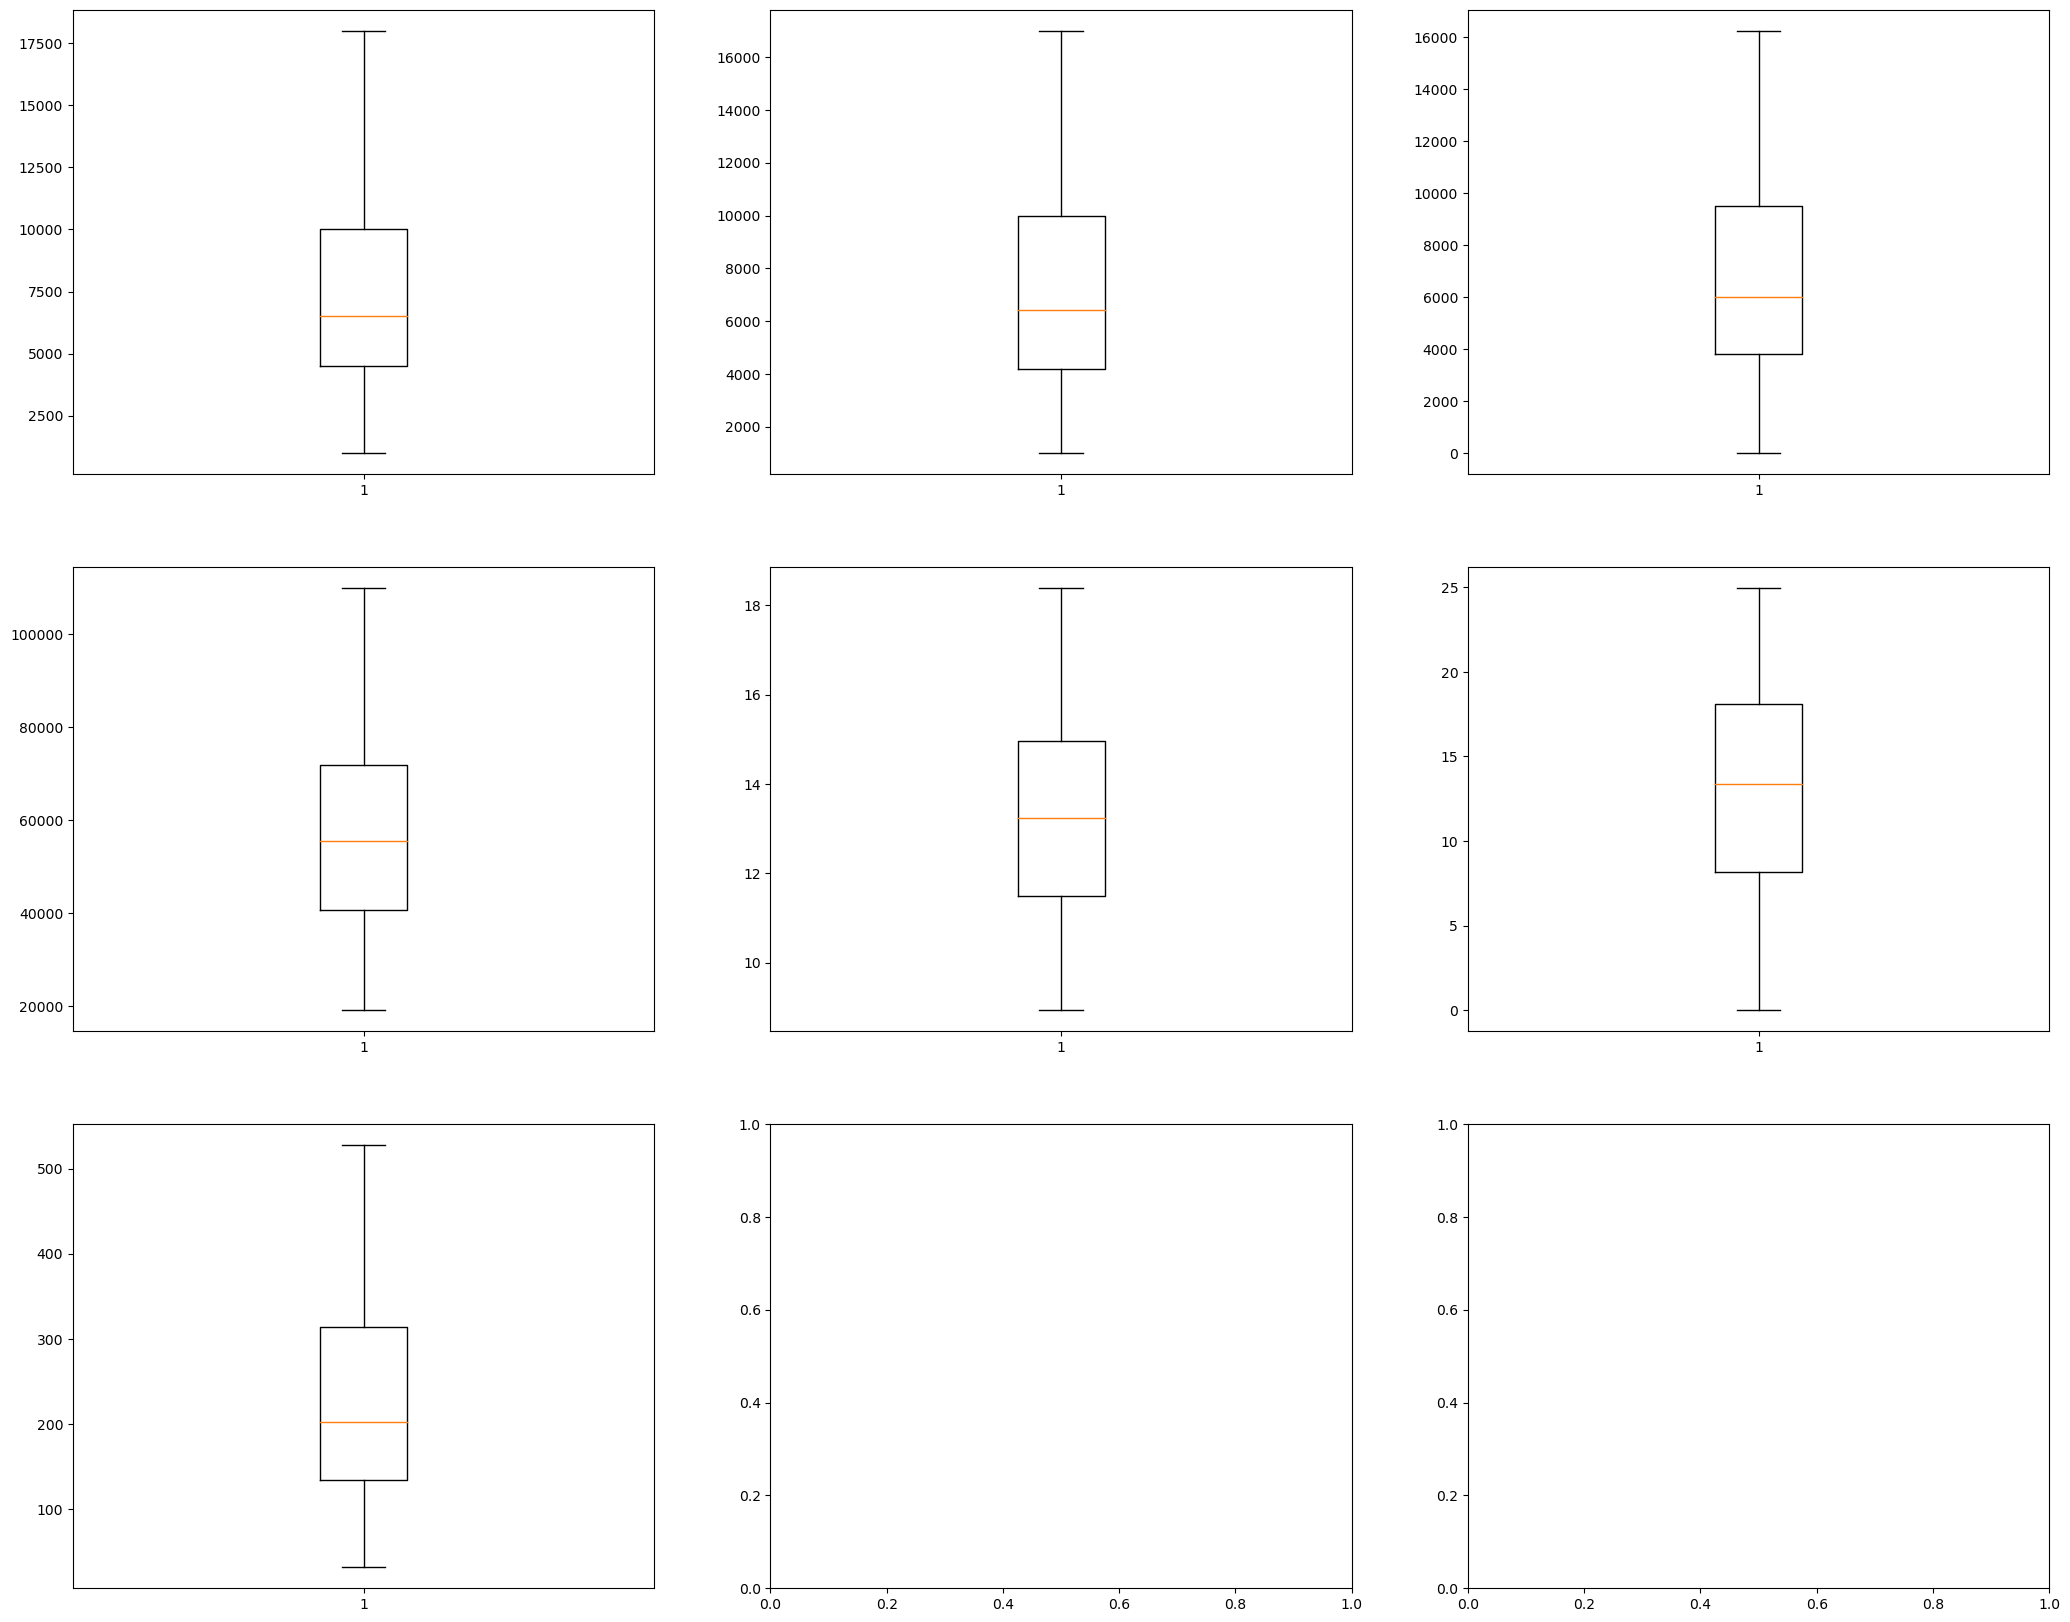

In [40]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharex=False, sharey=False)

loan_amount = axs[0][0].boxplot(loan_data_df['loan_amnt'])
axs[0][0].set_label('Loan Amount')

funded_amnt = axs[0][1].boxplot(loan_data_df['funded_amnt'])
axs[0][1].set_label('Funded Amount')

funded_amnt_inv = axs[0][2].boxplot(loan_data_df['funded_amnt_inv'])
axs[0][1].set_label('Funded Amount Inv')

annual_inc = axs[1][0].boxplot(loan_data_df['annual_inc'])
axs[1][0].set_label('Annual Inc')

int_rate = axs[1][1].boxplot(loan_data_df['int_rate'])
axs[1][1].set_label('Interest rate')

dti = axs[1][2].boxplot(loan_data_df['dti'])
axs[1][2].set_label('dti')

installment = axs[2][0].boxplot(loan_data_df['installment'])
axs[2][0].set_label('installment')

fig.set_size_inches(25.5, 20.5, forward=True)

plt.show()

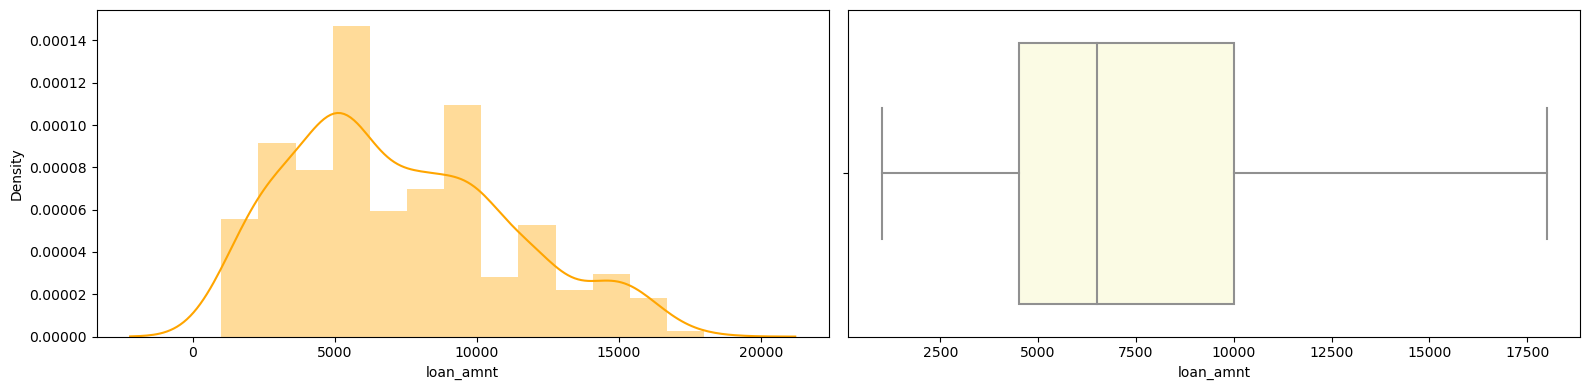

In [41]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sea.distplot(loan_data_df.loc[loan_data_df['loan_amnt'].notnull(), 'loan_amnt'], kde=True, hist=True, ax=p[0], color="orange")
sea.boxplot(x='loan_amnt', data=loan_data_df, ax=p[1], color="lightyellow")
plt.tight_layout()

plt.show()

In [42]:
loan_data_df['loan_amnt'].describe()

count      593.000000
mean      7270.320405
std       3830.281725
min       1000.000000
25%       4500.000000
50%       6500.000000
75%      10000.000000
max      18000.000000
Name: loan_amnt, dtype: float64

### Inference

1. Minimum percentile of loan applied is 5k
2. Maximum percentile of loan applied is 22k
3.  5-14k is range in which most loans are applied

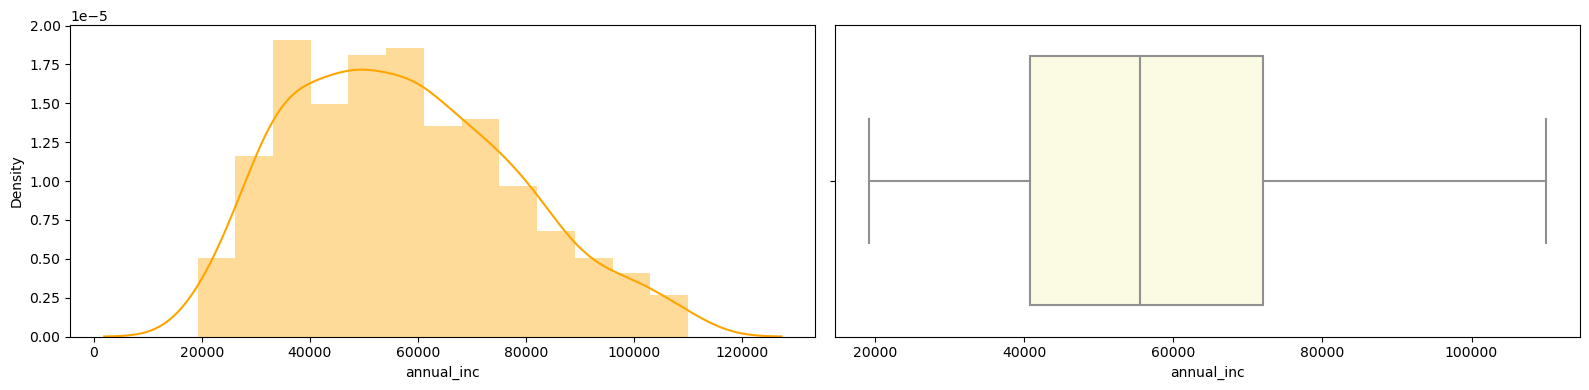

In [43]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sea.distplot(loan_data_df.loc[loan_data_df['annual_inc'].notnull(), 'annual_inc'], kde=True, hist=True, ax=p[0], color="orange")
sea.boxplot(x='annual_inc', data=loan_data_df, ax=p[1], color="lightyellow")
plt.tight_layout()
plt.show()

In [44]:
loan_data_df['annual_inc'].describe()

count       593.000000
mean      57357.764890
std       20664.829222
min       19200.000000
25%       40800.000000
50%       55500.000000
75%       72000.000000
max      110000.000000
Name: annual_inc, dtype: float64

#### Inference

1. The Average annual income is 58700 which is 58k
2. Minimum annual income is 4k and maximum is 165k

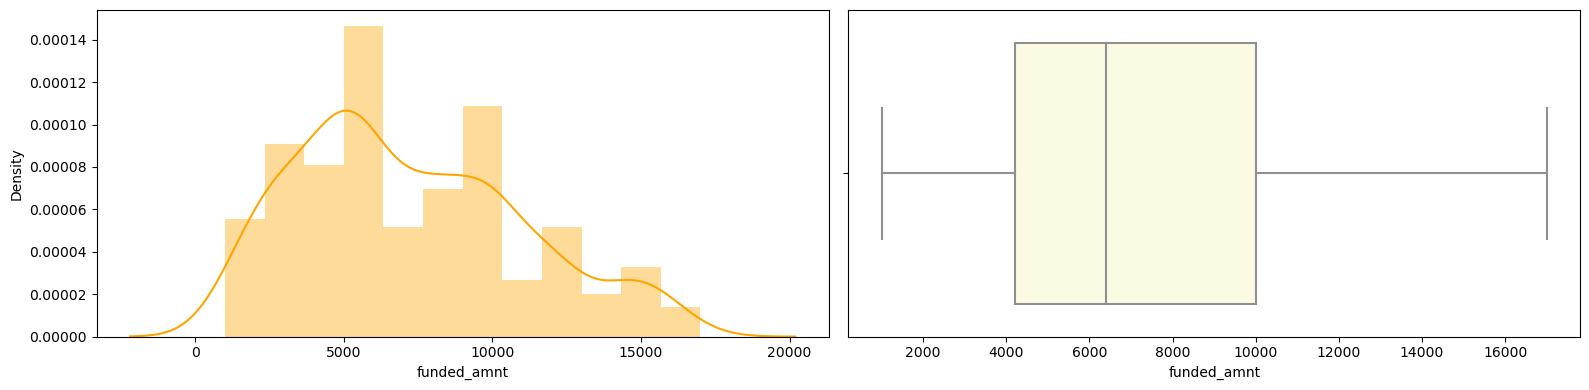

In [45]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sea.distplot(loan_data_df.loc[loan_data_df['funded_amnt'].notnull(), 'funded_amnt'], kde=True, hist=True, ax=p[0], color="orange")
sea.boxplot(x='funded_amnt', data=loan_data_df, ax=p[1], color="lightyellow")
plt.tight_layout()
plt.show()

In [46]:
loan_data_df['funded_amnt'].describe()

count      593.000000
mean      7220.573356
std       3811.614929
min       1000.000000
25%       4200.000000
50%       6400.000000
75%      10000.000000
max      17000.000000
Name: funded_amnt, dtype: float64

##### Inference 

1. The average funded amount is 8609

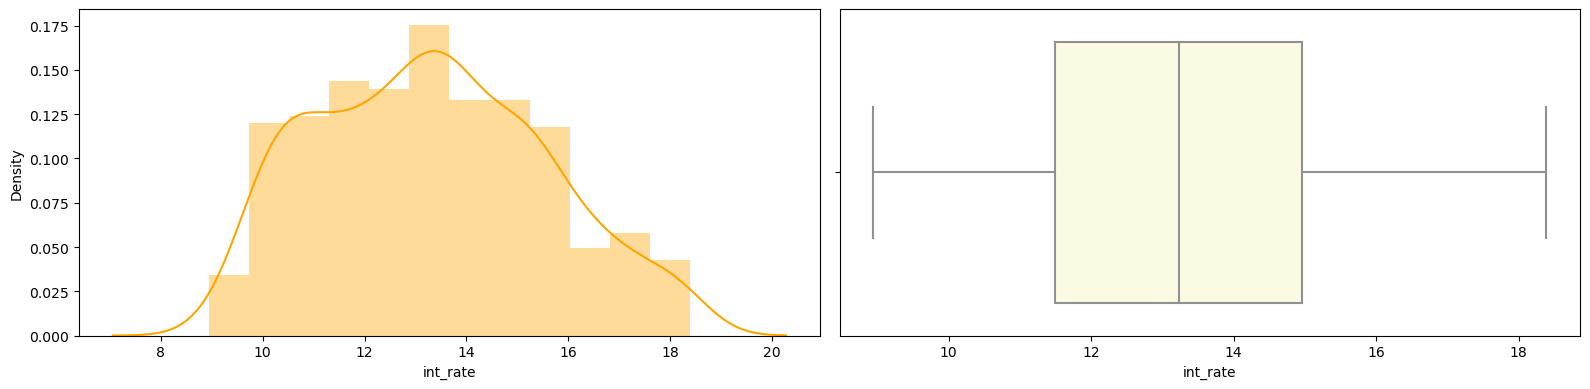

In [47]:
fig, p = plt.subplots(1,2, figsize=(16, 4))
sea.distplot(loan_data_df.loc[loan_data_df['int_rate'].notnull(), 'int_rate'], kde=True, hist=True, ax=p[0], color="orange")
sea.boxplot(x='int_rate', data=loan_data_df, ax=p[1], color="lightyellow")
plt.tight_layout()
plt.show()

In [48]:
loan_data_df['int_rate'].describe()

count    593.000000
mean      13.319460
std        2.249971
min        8.940000
25%       11.490000
50%       13.230000
75%       14.960000
max       18.390000
Name: int_rate, dtype: float64

##### Inference

1. The maximum interest rate is 17.44%
2. The Average interest rate is 11.49%

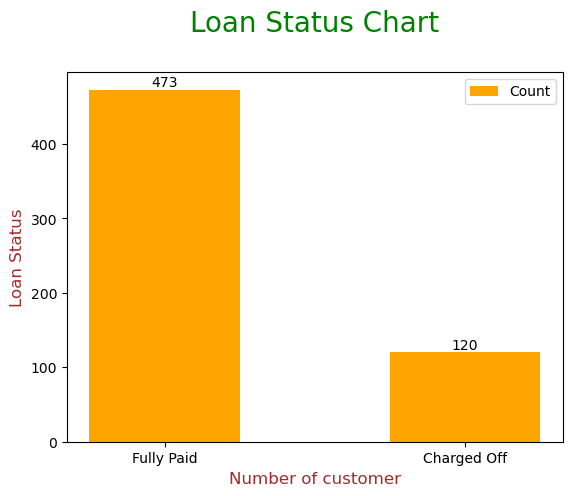

In [49]:
# Plotting customer vs status
customer = loan_data_df['loan_status'].value_counts().index.values
status = loan_data_df['loan_status'].value_counts().values
chart1 = plt.bar(customer, status, label='Count', width=0.5, color="orange")

# Add Title and font size
plt.title("Loan Status Chart\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Add label for x and Y axis
plt.xlabel("Number of customer", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Add formatter for label
plt.bar_label(chart1, fmt='%d')

plt.legend()
plt.show()

In [50]:
# Most of the customers are fully paid

### Purpose of loan

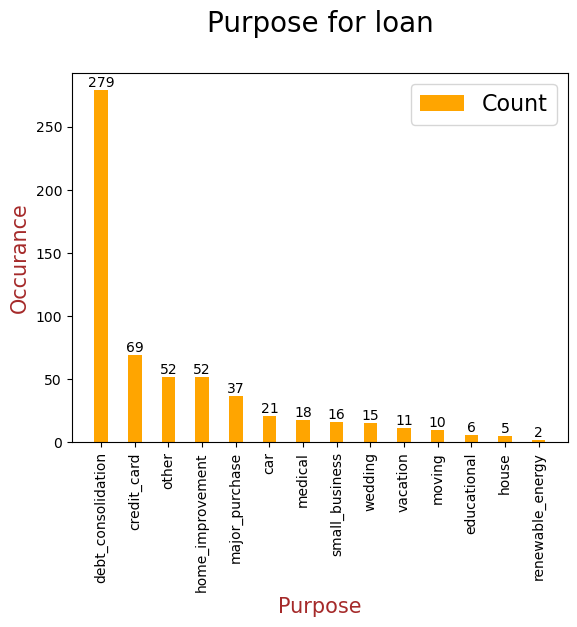

In [51]:
# Plot purpose variable vs occurance
purpose = loan_data_df['purpose'].value_counts().index.values
occurence = loan_data_df['purpose'].value_counts().values
chart1 = plt.bar(purpose, occurence, label='Count', width=0.4, color='orange')

plt.title("Purpose for loan\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

plt.xlabel("Purpose", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=90)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

In [52]:
# Majority of the loan applicants are for debt_consolidations.

#### Home Ownership

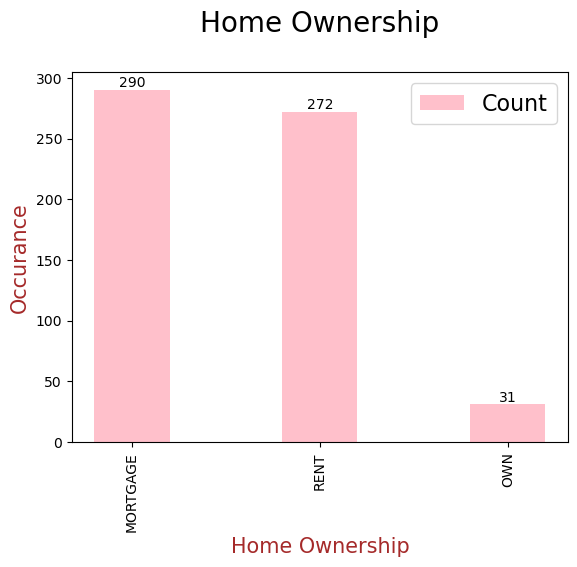

In [53]:
# Plot purpose variable vs occurance
home_ownership = loan_data_df['home_ownership'].value_counts().index.values
occurence = loan_data_df['home_ownership'].value_counts().values
chart1 = plt.bar(home_ownership, occurence, label='Count', width=0.4, color='pink')

plt.title("Home Ownership\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

plt.xlabel("Home Ownership", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=90)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

In [54]:
# Most of the application are living in RENT or MORTAGE

#### Loan applicants vs Experience

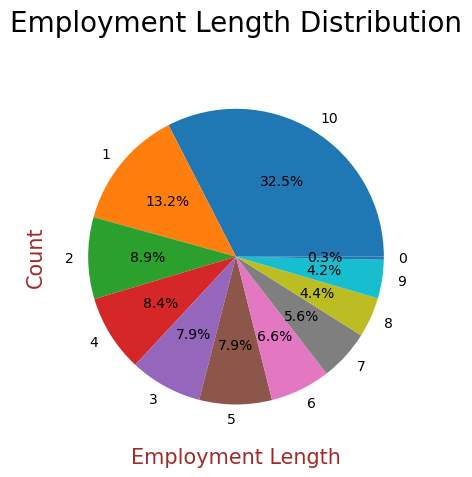

In [55]:
import matplotlib.pyplot as plt

loan_data_df['emp_length'].value_counts().plot(kind="pie", autopct='%1.1f%%')

plt.title("Employment Length Distribution\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Black'})
plt.xlabel("Employment Length", fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Brown'})

plt.show()

<Axes: ylabel='addr_state'>

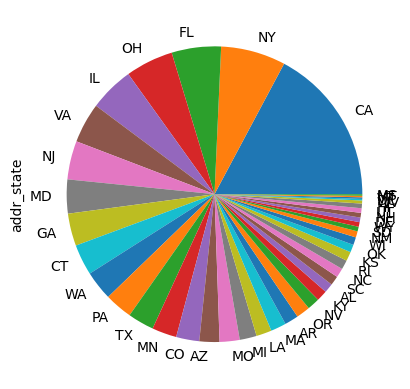

In [56]:
loan_data_df['addr_state'].value_counts().plot(kind="pie")

# Bivariate Analysis

### Grade vs loan status

In [57]:
grade_loan_df = loan_data_df.groupby(by=['grade', 'loan_status']).mean()

In [58]:
grade_loan_df.head()

id      member_id    loan_amnt  funded_amnt  \
grade loan_status                                                           
A     Fully Paid   414539.666667  475882.333333  4533.333333  4533.333333   
B     Charged Off  712183.800000  882253.600000  7638.333333  7445.833333   
      Fully Paid   667050.088398  829210.767956  6205.248619  6155.386740   
C     Charged Off  645412.925000  805072.350000  6293.750000  6293.750000   
      Fully Paid   614822.183908  766524.988506  6926.436782  6841.954023   

                   funded_amnt_inv       term   int_rate  installment  \
grade loan_status                                                       
A     Fully Paid       4436.259942  36.000000   9.400000   144.530000   
B     Charged Off      6694.072653  37.600000  11.108000   235.341000   
      Fully Paid       5738.079371  37.458564  11.010276   196.850442   
C     Charged Off      5967.624036  40.200000  13.714250   193.827000   
      Fully Paid       6255.735297  38.068966  13.563218   224.997644   

                   emp_length    annual_inc  ...  collections_12_mths_ex_med  \
grade loan_status                            ...                               
A     Fully Paid     3.666667  53998.666667  ...                         0.0   
B     Charged Off    6.200000  51995.066667  ...                         0.0   
      Fully Paid     5.712707  59881.830663  ...                         0.0   
C     Charged Off    5.725000  48584.025000  ...                         0.0   
      Fully Paid     6.132184  56601.076264  ...                         0.0   

                   policy_code  acc_now_delinq  chargeoff_within_12_mths  \
grade loan_status                                                          
A     Fully Paid           1.0             0.0                       0.0   
B     Charged Off          1.0             0.0                       0.0   
      Fully Paid           1.0             0.0                       0.0   
C     Charged Off          1.0             0.0                       0.0   
      Fully Paid           1.0             0.0                       0.0   

                   delinq_amnt  pub_rec_bankruptcies  tax_liens   issue_year  \
grade loan_status                                                              
A     Fully Paid           0.0              0.666667        0.0  2008.666667   
B     Charged Off          0.0              0.700000        0.0  2010.433333   
      Fully Paid           0.0              0.734807        0.0  2010.276243   
C     Charged Off          0.0              0.550000        0.0  2010.175000   
      Fully Paid           0.0              0.706897        0.0  2010.097701   

                   issue_day  issue_month  
grade loan_status                          
A     Fully Paid         1.0    10.000000  
B     Charged Off        1.0     6.666667  
      Fully Paid         1.0     6.944751  
C     Charged Off        1.0     7.475000  
      Fully Paid         1.0     6.534483  

[5 rows x 39 columns]

<Axes: xlabel='grade'>

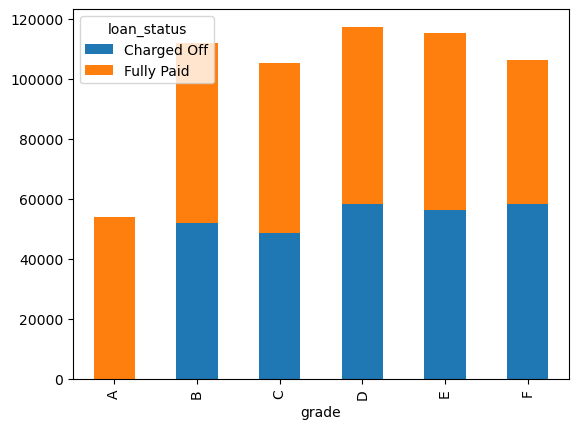

In [59]:
grouped_data = loan_data_df.groupby(['grade', 'loan_status'])['annual_inc'].mean().unstack()
grouped_data.plot(kind='bar', stacked=True)

array([<Axes: title={'center': 'Charged Off'}, xlabel='Grade, Loan Status', ylabel='Annual Income'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='Grade, Loan Status', ylabel='Annual Income'>],
      dtype=object)

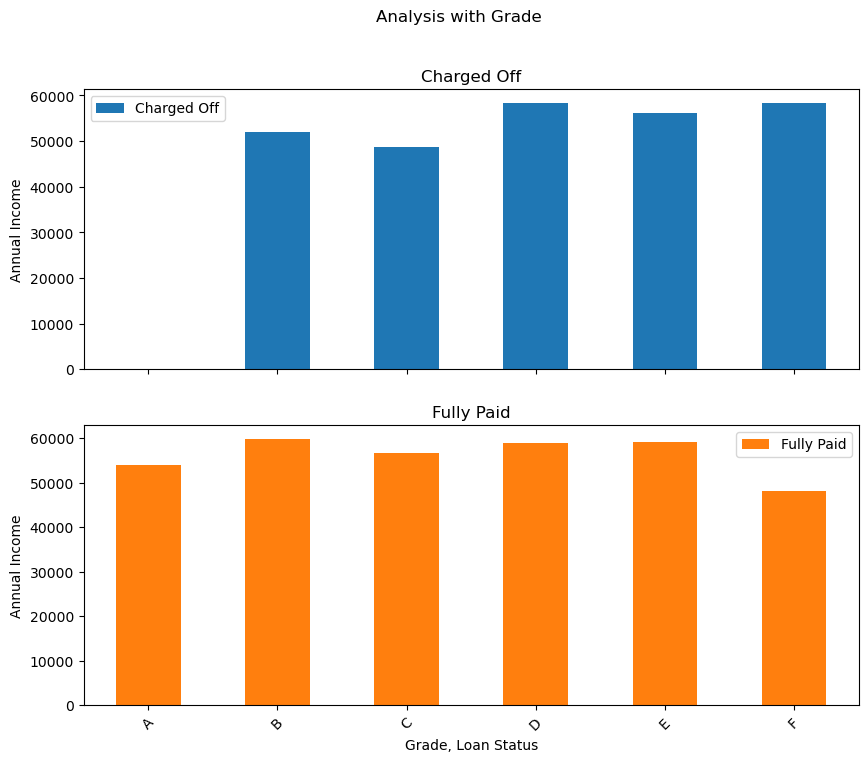

In [60]:
grouped_data.plot(kind='bar', title='Analysis with Grade', ylabel='Annual Income',
         xlabel='Grade, Loan Status', figsize=(10, 8), subplots=True, rot=45)

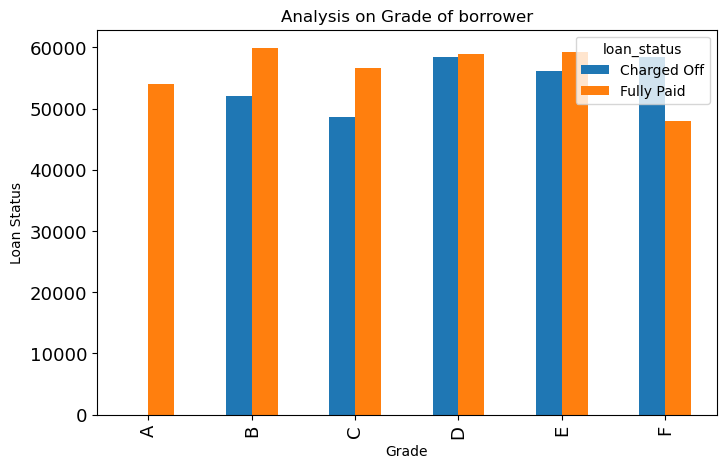

In [61]:
plot = grouped_data.plot(kind='bar', title='Analysis on Grade of borrower', ylabel='Loan Status',
         xlabel='Grade', figsize=(8, 5), fontsize=13)

In [62]:
loan_data_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_year', 'issue_day',
       'issue_mont

In [63]:
bins = [0, 40000, 50000, 60000, 70000, 80000, float('inf')]
labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_data_df['annual_inc_bucket'] = pd.cut(loan_data_df['annual_inc'], bins=bins, labels=labels, right=False)
loan_data_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_day,issue_month,annual_inc_bucket
94,1068545,1303147,7000,7000,7000.00,36,11.71,231.54,B,Harris,...,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12,0 - 40k
359,1064908,1298959,9000,9000,9000.00,36,14.65,310.45,C,st catherine of siena,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12,40k - 50k
382,1064623,1298440,5600,5600,5600.00,36,10.65,182.42,B,ECR Inc,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12,60k - 70k
587,1062384,1294244,2400,2400,2400.00,36,12.69,80.51,B,Portland Public Schools,...,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,1,12,50k - 60k
1323,1052333,1283889,15000,15000,15000.00,36,12.42,501.23,B,United States Postal Service,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2011,1,12,70k - 80k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39433,200600,200597,7500,7500,1599.78,36,9.83,241.41,B,UCLA Medical Center,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2008,1,1,80k - above
39475,186572,186568,12000,12000,725.00,36,9.01,381.66,B,Bank of America Corp.,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2007,1,12,80k - above
39551,158706,158450,12375,12375,1000.00,36,10.91,404.62,C,Fullmoon Software,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2007,1,12,80k - above
39562,154154,151536,4800,4800,1100.00,36,10.28,155.52,C,E.E. Wine Inc,...,INDIVIDUAL,0,0.0,0,1.0,0.0,2007,1,11,0 - 40k


In [64]:
# Annual income against Chargedoff_Proportion - Bivariate Analysis 

inc_vs_loan = loan_data_df.groupby(['annual_inc_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_vs_loan['Total'] = inc_vs_loan['Charged Off']+ inc_vs_loan['Fully Paid']
inc_vs_loan['Chargedoff_percentage'] = inc_vs_loan['Charged Off'] / inc_vs_loan['Total']
inc_vs_loan.sort_values('Chargedoff_percentage', ascending=False)
inc_vs_loan


loan_status,annual_inc_bucket,Charged Off,Fully Paid,Total,Chargedoff_percentage
0,0 - 40k,29,103,132,0.219697
1,40k - 50k,28,72,100,0.280000
2,50k - 60k,20,77,97,0.206186
3,60k - 70k,21,73,94,0.223404
4,70k - 80k,8,66,74,0.108108
5,80k - above,14,82,96,0.145833


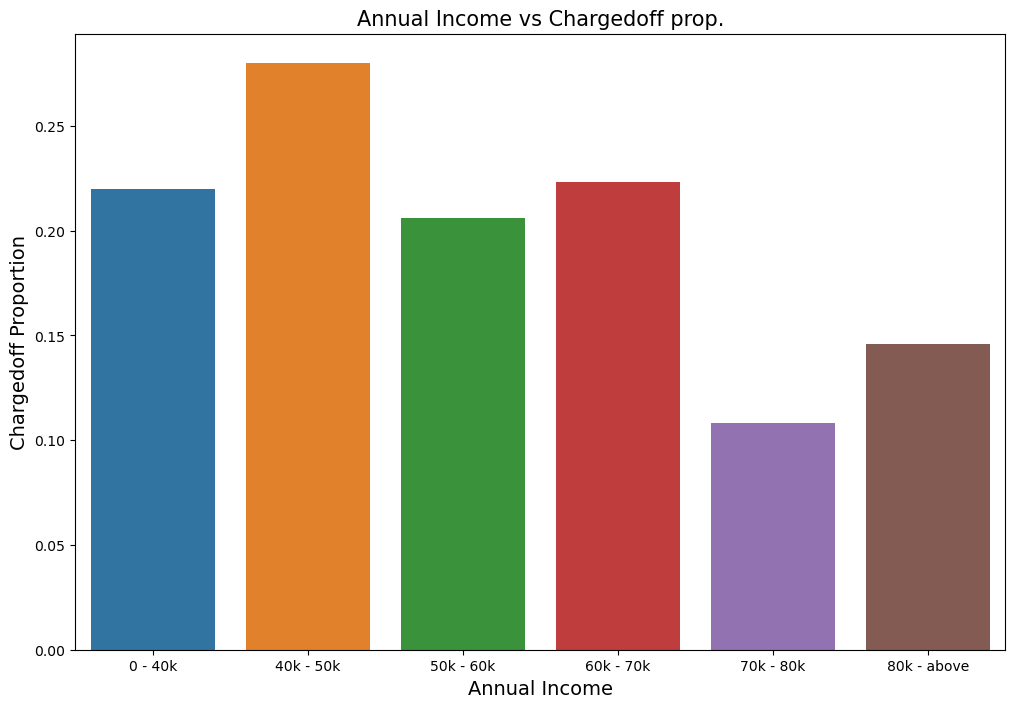

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff prop.',fontsize=15)
ax1=sea.barplot(x='annual_inc_bucket', y='Chargedoff_percentage', data=inc_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

#### Observations:
1. Income range 70-80k  has less chances of charged off.
2. Income range 40-50k has high chances of charged off.

In [66]:
bins = [0, 9, 11, 13, 15, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
loan_data_df['int_rate_bucket'] = pd.cut(loan_data_df['int_rate'], bins=bins, labels=labels, right=False)

In [67]:
#  Intrest rate  against Chargedoff_Proportion - Bivariate Analysis

interest_vs_loan = loan_data_df.groupby(['int_rate_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_bucket,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,Very High,41,104,145,0.282759
3,High,36,137,173,0.208092
2,Moderate,26,129,155,0.167742
1,Low,17,102,119,0.142857
0,Very Low,0,1,1,0.000000


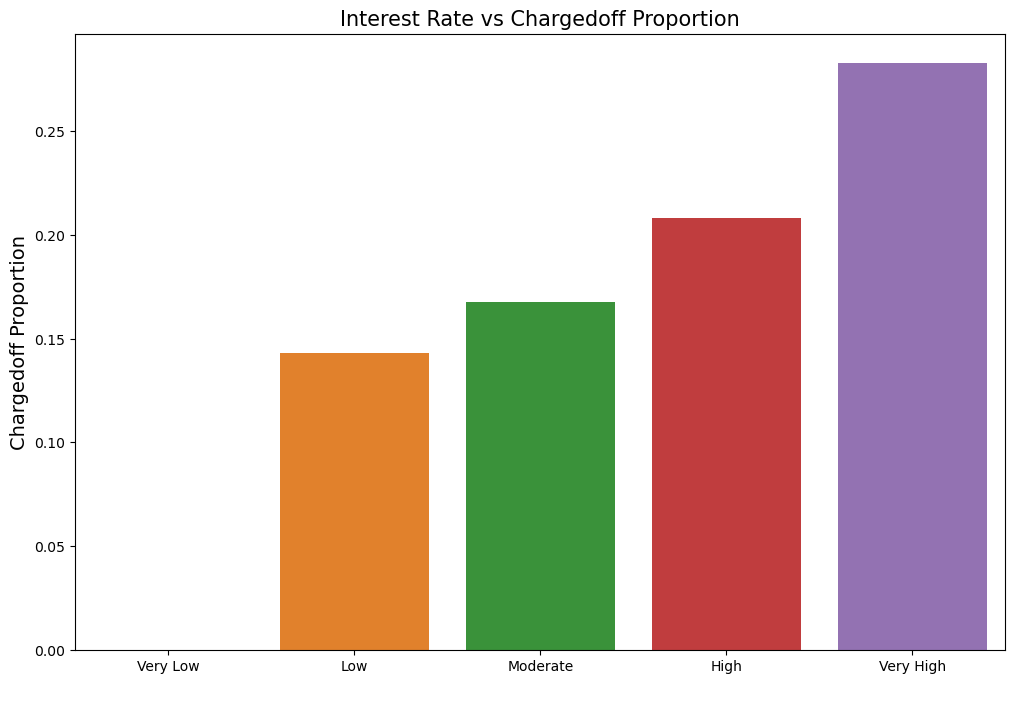

In [68]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='int_rate_bucket', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observation
1. Interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimum 5 %.
2. Interest rate more than 16% or very high has good chances of charged off as compared to RENT interest rates.
3. Charged off proportion is increasing with higher interest rates.

In [69]:
# Home Ownership against Chargedoff_Proportion - Bivariate Analysis

home_ownership_vs_loan = loan_data_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,RENT,62,210,272,0.227941
0,MORTGAGE,54,236,290,0.186207
1,OWN,4,27,31,0.129032


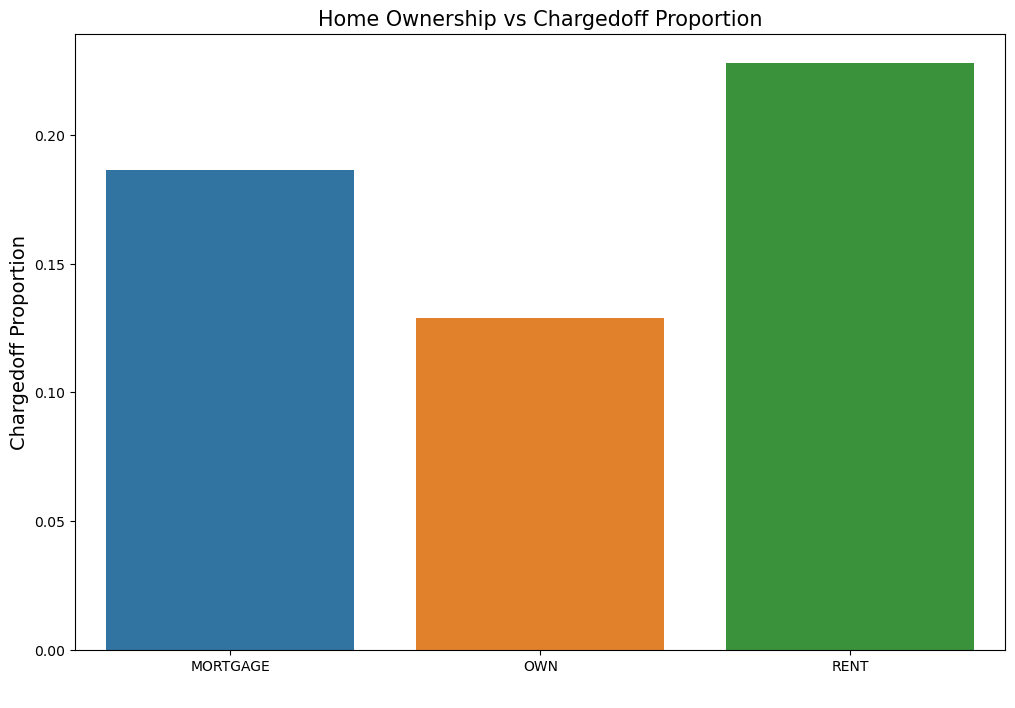

In [70]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations:
1. RENT ownership has highest chargedoff
2. Those who are not owning the home is having high chances of loan defaults.

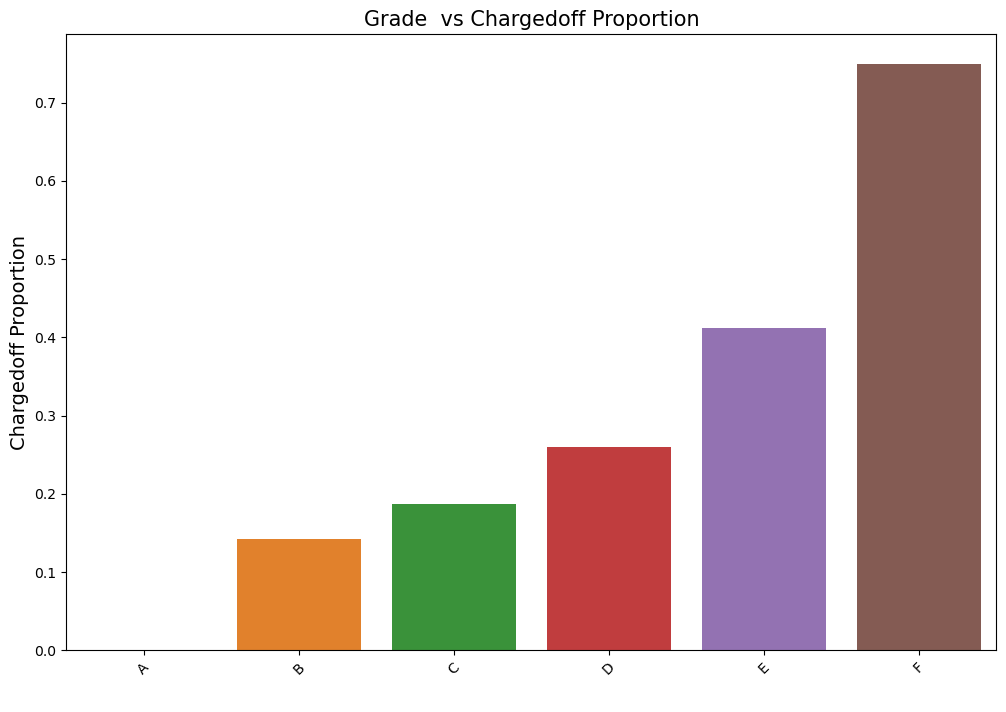

In [71]:
grade_vs_loan = loan_data_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Observation
1. The Loan applicants with loan Grade F is having higest Loan Defaults.
2. The Loan applicants with loan A is having lowest Loan Defaults.

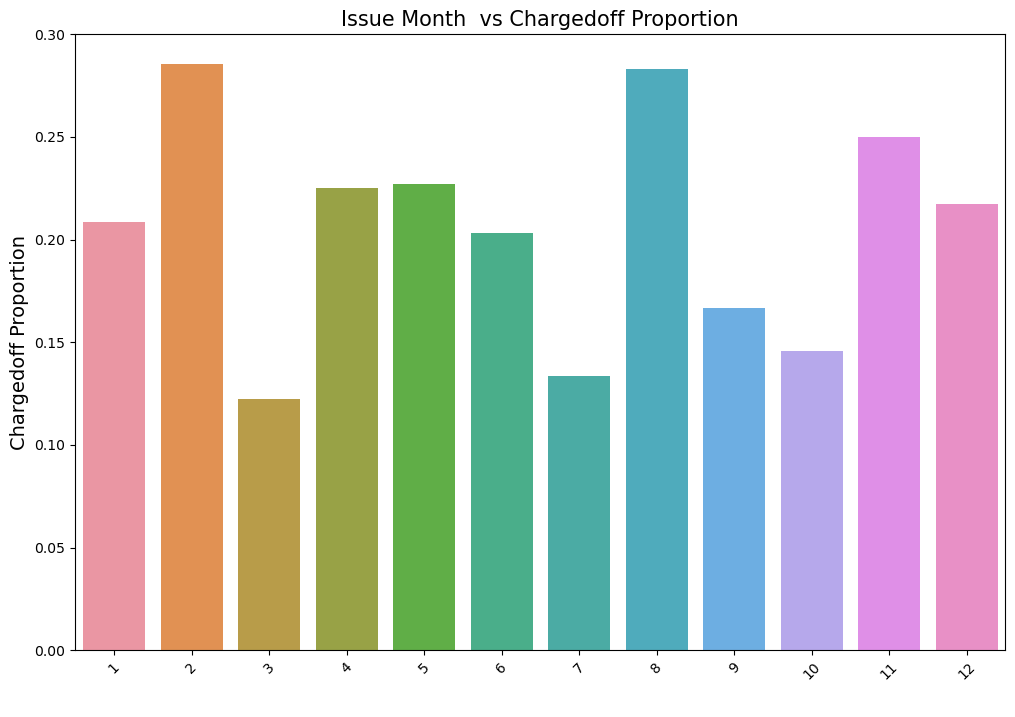

In [72]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_data_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Observation
1. Those loan has been issued in Feb, Aug and Nov is having high number of loan defaults
2. Those loan has been issued in month of March is having high number of loan defaults

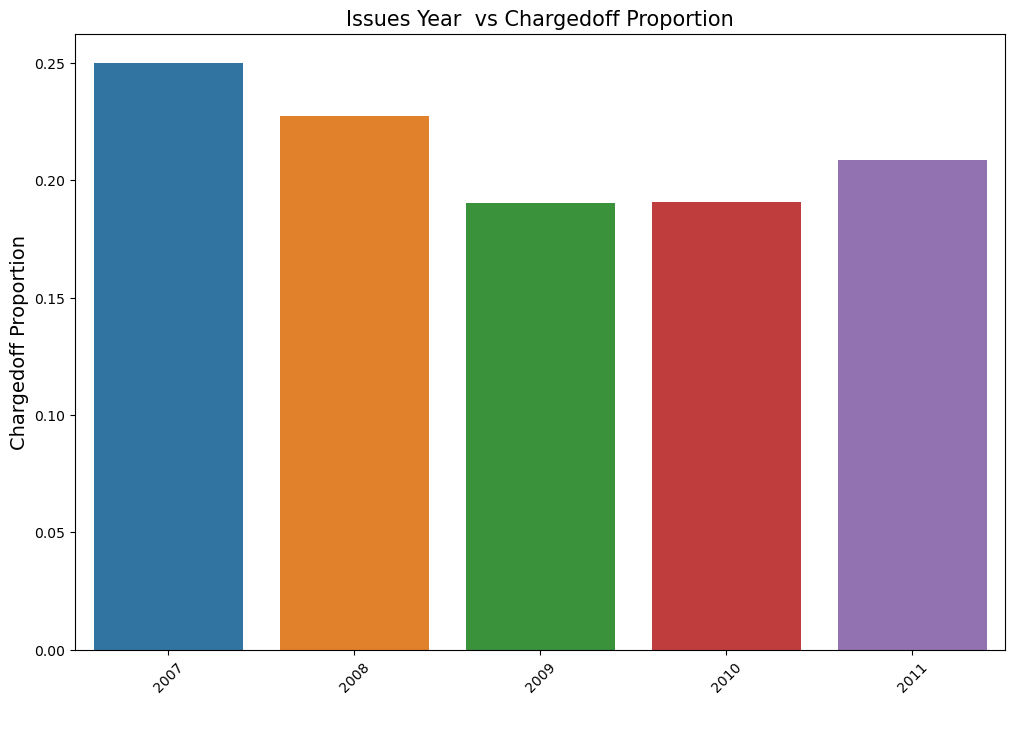

In [73]:
# Issues of Year  against Chargedoff_Proportion - Bivariate Analysis

issue_year_vs_loan = loan_data_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Observation
1. Year 2007 is highest loan defaults.
2. 2009 is having lowest loan defaults.

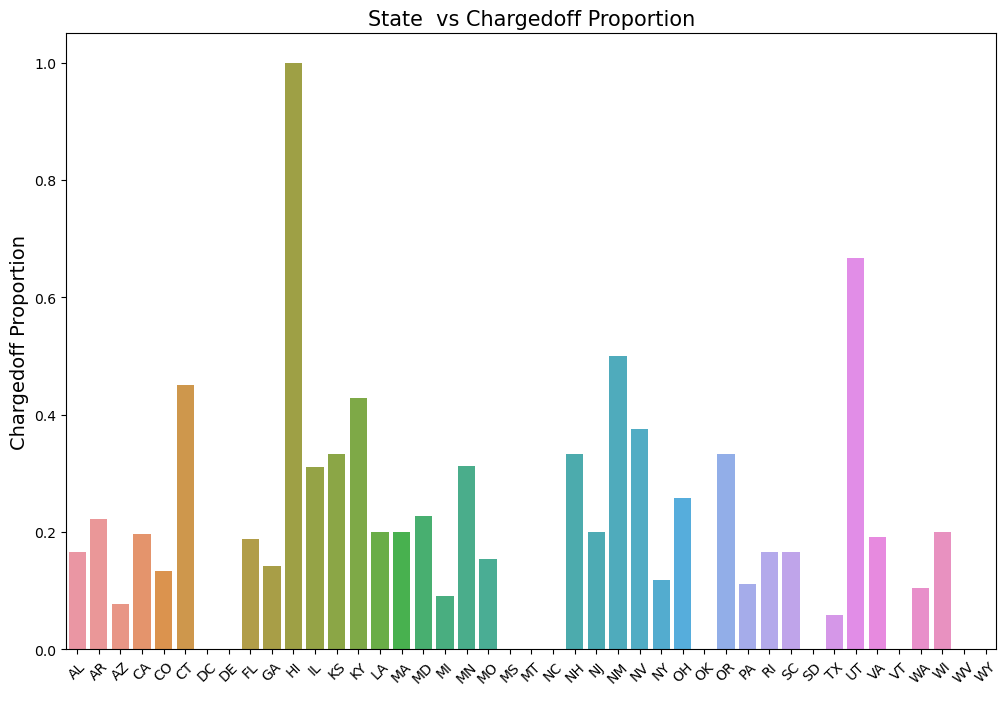

In [74]:
# Address state  against Chargedoff_Proportion - Bivariate Analysis

addr_state_vs_loan = loan_data_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Observations
1. HI States is holding highest number of loan defaults.
2. TX is having low number of loan defaults

<Figure size 6000x6000 with 0 Axes>

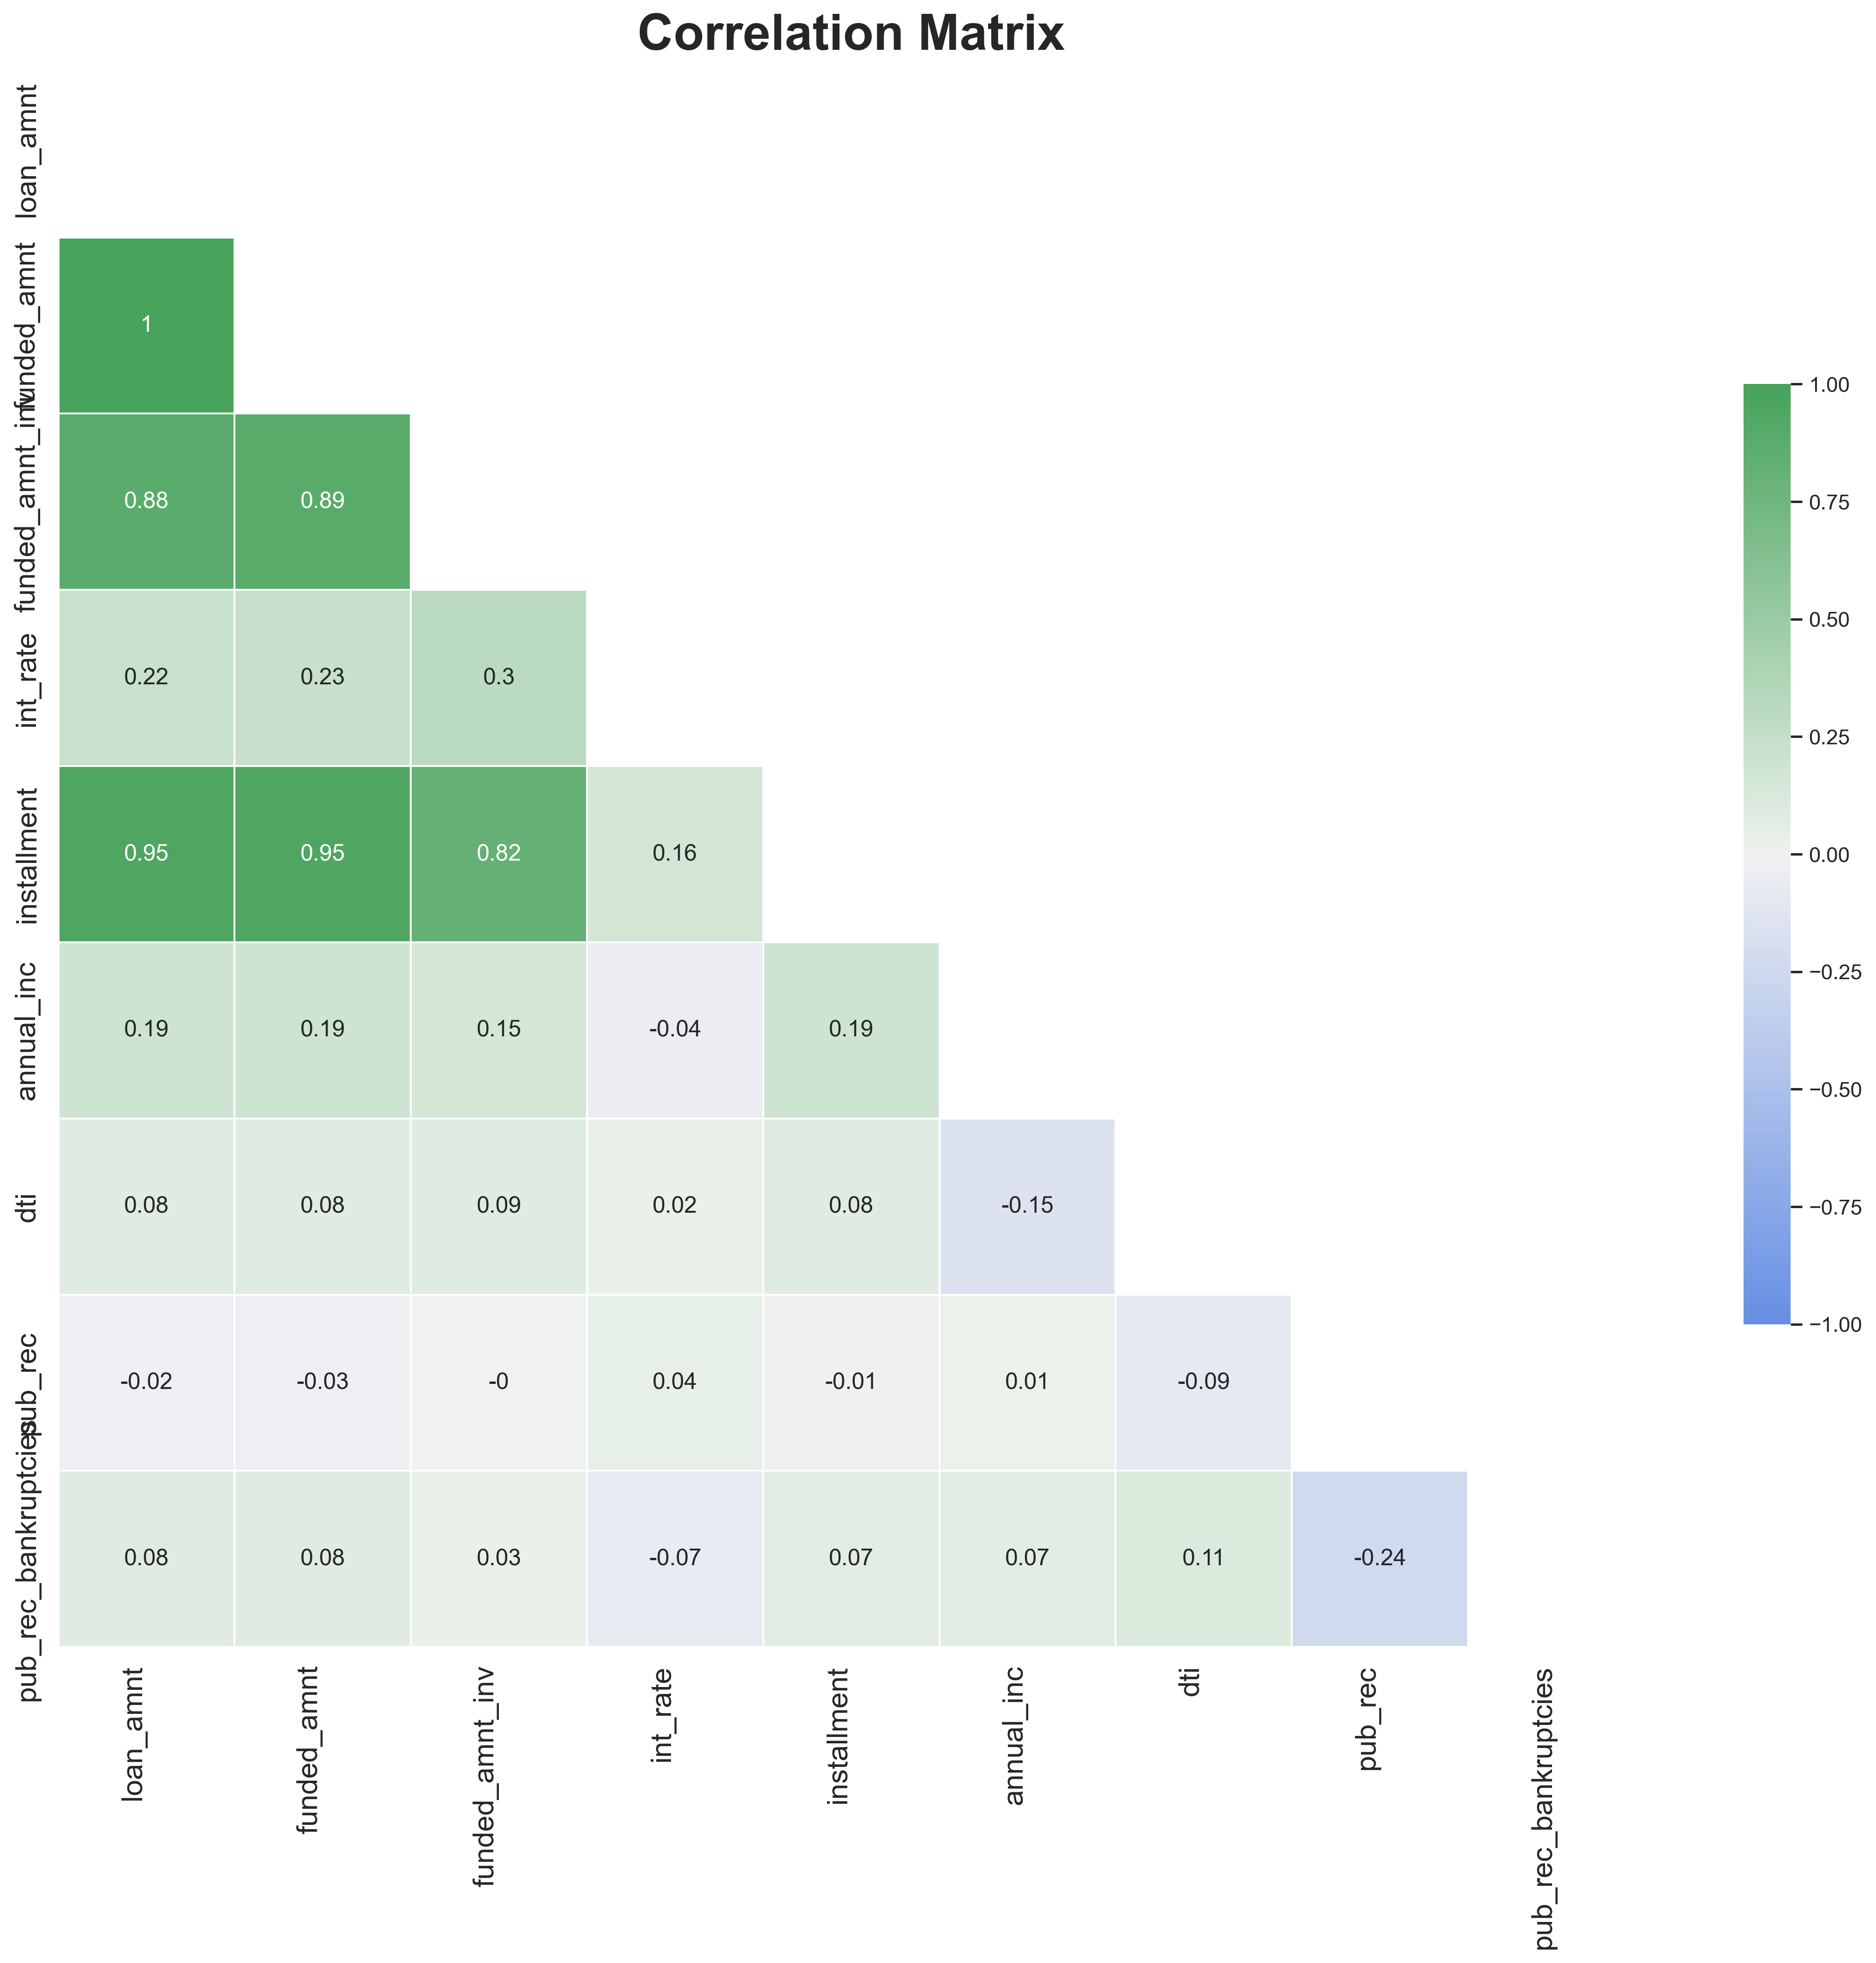

In [75]:
sea.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan_data_df.copy()
col_continious = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']
df_corr_plot1 = df_corr_plot1.loc[:,col_continious]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sea.diverging_palette(255, 133, l=60, n=20, center="light", as_cmap=True)
ax = sea.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()